# GEOG5990M Portfolio assignment  (TEMPLATE)

Student ID number:



## Block One Submission
Using data introduced in the course create a visualisation showing the association between two variables. Using skills developed in the practical exercises take any steps required to clean or pre-process the data.  It is expected that you wills change the default appearance of the markers and include an appropriate title and axis labels. Further marks will be awarded for appropriate use of colour pallets, inclusion of additional categorical variables in the visualisation and other steps taken to ensure effective data visualisation.

Ensure all the code has detialed comments.

Write a brief paragraph in markdown (max. 300 words) detailing the visualisation choices made given the types of data you have chosen.

In [1]:
# import required packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [28]:
# Data-preprocessing
# read data
cv=pd.read_csv("/content/OA_GEOG990M_data.csv")
# Check data types and convert inappropriate data types
cv.dtypes
cv['POPULATION'] = cv['POPULATION'].astype(int)
cv['OAC_super_group_code'] = cv['OAC_super_group_code'].astype(object)
# Check for missing values, but no missing values detected
cv.info()
# Calculate and generate male-female population ratio, and examine data information
cv['% Male'] = (cv['Males'] / cv['POPULATION']) * 100
cv['% Female'] = (cv['Females'] / cv['POPULATION']) * 100
cv.describe()
# Filter data for Leeds
cv_leeds = cv.loc[cv['SUB_REGION'] == 'Leeds']
# Generate sex_ratio_status in data cv_leeds, representing the bias of male-female ratio in each region
sex_ratio_status = []
for index, row in cv_leeds.iterrows():
    if row['% Male'] > 50:
        sex_ratio_status.append('Male_Slightly_More')
    else:
        sex_ratio_status.append('Female_Slightly_More')
cv_leeds['sex_ratio_status'] = sex_ratio_status
cv_leeds.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181408 entries, 0 to 181407
Data columns (total 30 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   Unnamed: 0                                                              181408 non-null  int64  
 1   Area                                                                    181408 non-null  object 
 2   All usual residents                                                     181408 non-null  int64  
 3   Males                                                                   181408 non-null  int64  
 4   Females                                                                 181408 non-null  int64  
 5   output_area                                                             181408 non-null  object 
 6   Consumer_Vulnerability                                              

,Unnamed: 0,Area,All usual residents,Males,Females,output_area,Consumer_Vulnerability,consumer_vulnerability_cluster,OA_SA,SUB_REGION,...,Economically_Inactive_perecentage,Economically_inactive_Retired_perecentage,Economically_inactive_Student_including_full-time_students_perecentage,Economically_inactive_Looking_after_home_or_family_perecentage,Economically_inactive_Long-term_sick_or_disabled_perecentage,Economically_inactive_Other_perecentage,2011_output_area,% Male,% Female,sex_ratio_status
55046,55046,E00056750,279,134,145,E00056750,On a Budget,D,E00056750,Leeds,...,23.7,14.7,3.3,1.9,3.3,0.5,E00056750,48.028674,51.971326,Female_Slightly_More
55047,55047,E00056751,296,145,151,E00056751,Prosperous Professionals,A,E00056751,Leeds,...,18.9,12.3,2.4,3.3,0.9,0.0,E00056751,48.986486,51.013514,Female_Slightly_More
55048,55048,E00056752,407,186,221,E00056752,Prosperous Professionals,A,E00056752,Leeds,...,23.6,15.2,3.9,2.3,0.6,1.6,E00056752,45.700246,54.299754,Female_Slightly_More
55049,55049,E00056753,246,114,132,E00056753,Vulnerable Pensioners,F,E00056753,Leeds,...,34.2,26.8,2.0,0.0,4.0,1.3,E00056753,46.341463,53.658537,Female_Slightly_More
55050,55050,E00056754,272,137,135,E00056754,Prosperous Professionals,A,E00056754,Leeds,...,18.3,11.5,1.9,2.4,0.0,2.4,E00056754,50.367647,49.632353,Male_Slightly_More


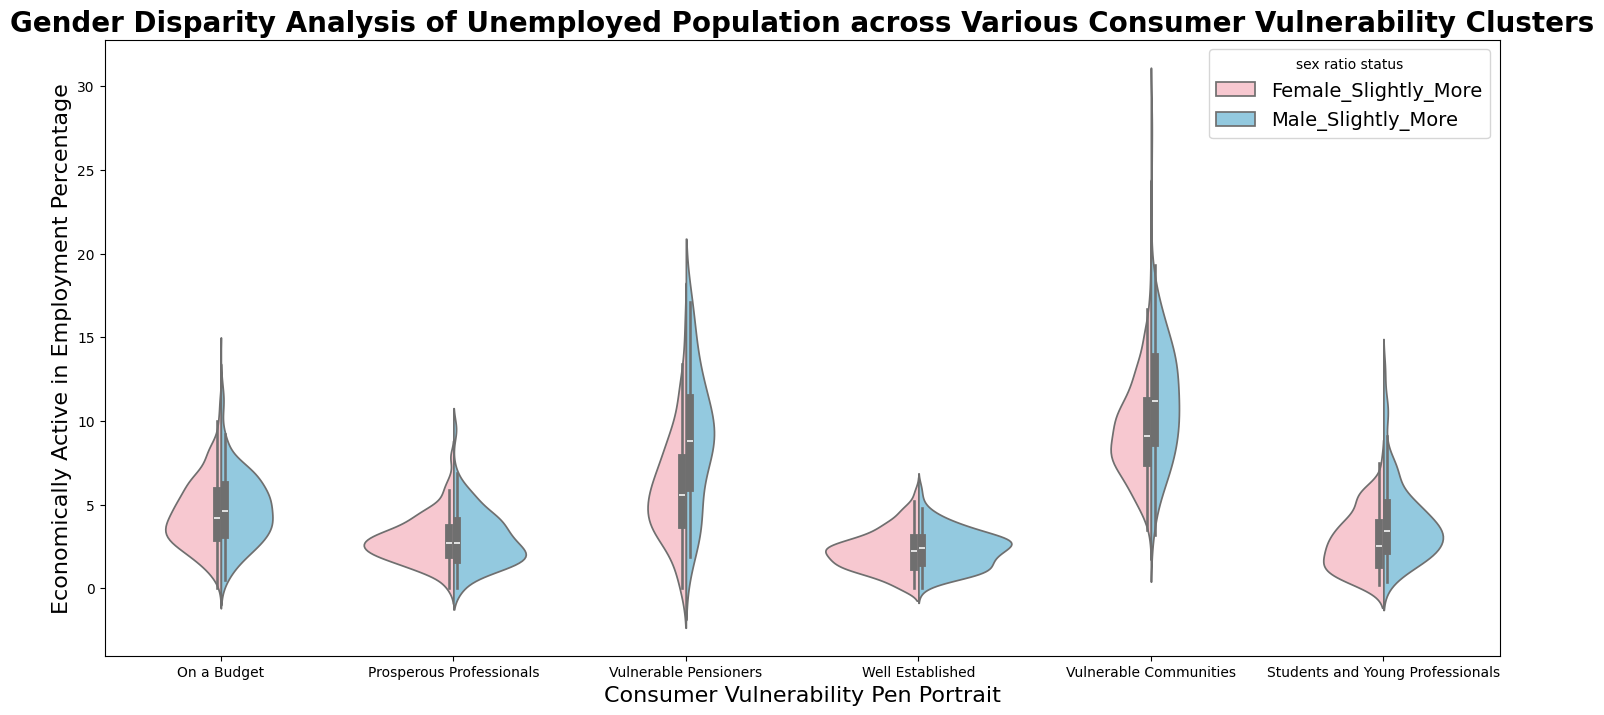

In [29]:
# Data visualisation
plt.figure(figsize=(18, 8))
# Create a violin plot to visualize the relationship between consumer vulnerability, the percentage of economically active unemployed individuals, and the gender disparity across different consumer vulnerability clusters.
sns.violinplot(x='Consumer_Vulnerability', y='Economically_active_Unemployed_perecentage', hue='sex_ratio_status', split=True, data=cv_leeds, palette={'Male_Slightly_More': 'skyblue', 'Female_Slightly_More': 'pink'})
# set title
plt.title('Gender Disparity Analysis of Unemployed Population across Various Consumer Vulnerability Clusters', fontsize=20, fontweight='bold', loc='center')
# set axis labels
plt.xlabel('Consumer Vulnerability Pen Portrait', fontsize=16)
plt.ylabel('Economically Active in Employment Percentage', fontsize=16)
# set legend
plt.legend(title='sex ratio status', fontsize=14)

plt.show()


### Block One Submission
Data Types and Features Understanding:
My code selected a dataset related to consumer vulnerability, which includes numerical data such as 'POPULATION' and 'Economically_active_Unemployed_percentage', as well as categorical data such as 'REGION' and 'Consumer_Vulnerability'.

Visualization Objective:
In the Leeds area, I explored the proportion of population that remains economically active despite being unemployed across different consumer vulnerability clusters, and investigated the influence of gender proportion on this behavior.

Data Selection:
Data preprocessing was conducted to add numerical data on male and female population proportions, and Leeds-specific data was filtered from the dataset for analysis. Within the Leeds dataset, I created a categorical variable named 'sex_ratio_status' to label whether each region has a predominance of males or females.

Visualization Choice:
I opted for a violin plot as the visualization method. Violin plots effectively display data distribution and facilitate comparison between different categories. The x-axis describes the 'Consumer Vulnerability Pen Portrait', while the y-axis represents the proportion of economically active population under unemployment. I utilized the 'sex_ratio_status' variable as hue to examine the influence of gender on each consumer vulnerability cluster. Additionally, I employed the split parameter to differentiate regions with male or female predominance using sky blue and pink colors respectively, enhancing the clarity of data comparison. To enhance clarity and readability, I set titles, axis labels, legends, and adjusted font sizes accordingly.












    

## Block Two Submission:

Using the course notebooks and lectures as a guide create a static visualisation showing the spatial distribution of a variable of your choice. The type of spatial visualisation chosen should be suitable for the data chosen and appropriate data cleaning and pre-processing steps undertaken. Using skills demonstrated in the python notebooks change the default appearance of the visualisation of choice. Include an appropriate title and legend labels. Further marks will be awarded for appropriate use of colour pallets and other customisations to aid interpretation and improve accessibility. Write a brief paragraph in markdown (max 300 words) detailing the visual design choices made.

In [7]:
# import any further required packages
!pip install contextily
!pip install geoplot

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns
import mapclassify as mc



import geoplot as gplt
import geoplot.crs as gcrs



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.3 MB/s eta 0:00:00


In [26]:
# Data-preprocessing
# read datd
oa_leeds=gpd.read_file('/content/oa_leeds.gpkg')
wards_leeds=gpd.read_file('/content/wards_leeds.gpkg')
persons_per_bedroom=pd.read_csv("/content/persons_per_bedroom.csv")
# check data
oa_leeds.head()
oa_leeds.crs
# Convert to British National Coordinate System (EPSG:27700)
leeds_oa= oa_leeds.to_crs(epsg=27700)
leeds_wards=wards_leeds.to_crs(epsg=27700)
# join a non-spatial dataset to the spatial dataset
leeds_bedroom  = pd.merge(leeds_oa, persons_per_bedroom,  left_on='OA_SA', right_on='OA_code', how='left')
# Create a new column named 'percentage_water_meter' in the Leeds bedroom dataset, representing the percentage of households suitable for water meter installation in Leeds
leeds_bedroom['percentage_water_meter']=((leeds_bedroom['Over 0.5 and up to 1.0 persons per bedroom']+leeds_bedroom['Up to 0.5 persons per bedroom'])/leeds_bedroom['total households'])*100


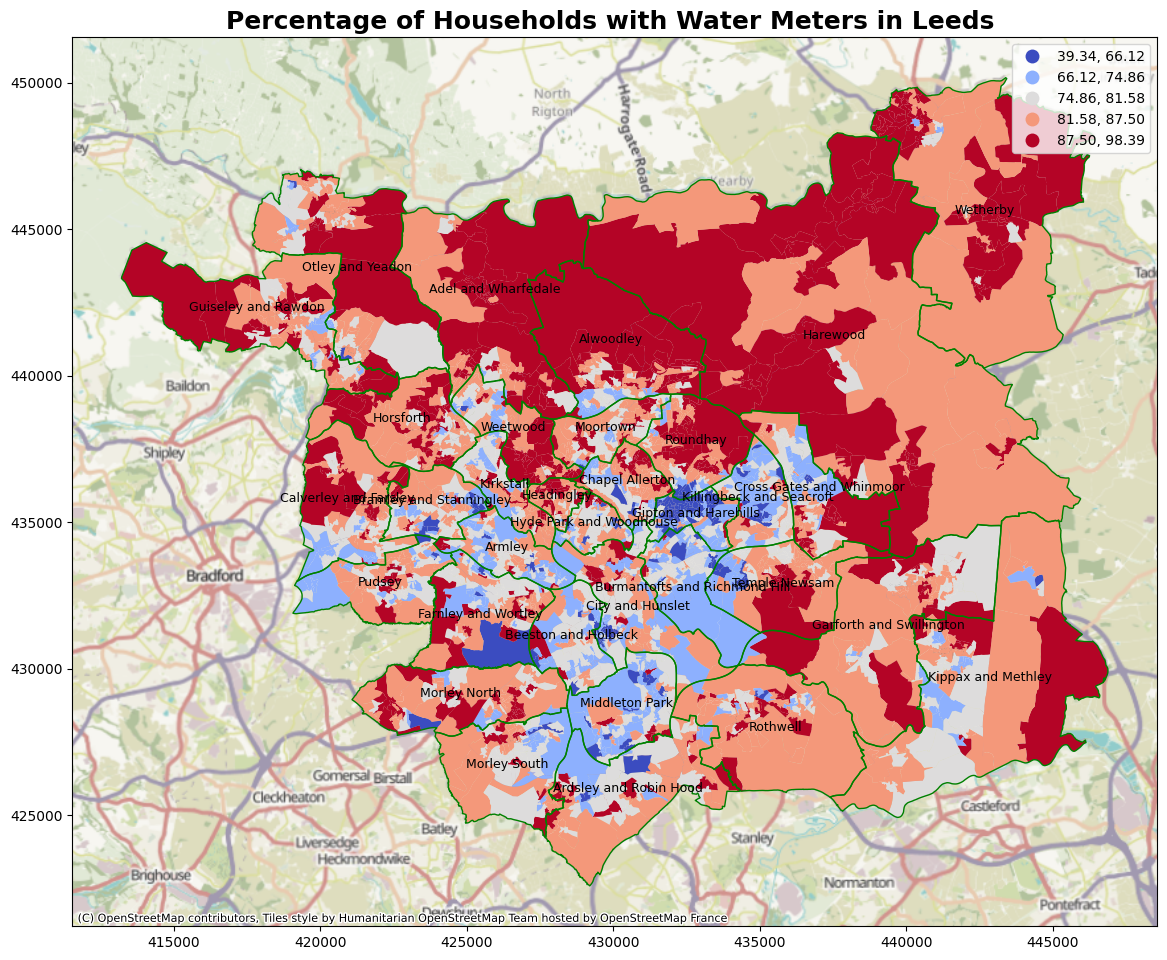

In [27]:
# Data Visualisation
f, ax = plt.subplots(1,  figsize=(14, 14))

# Put the leeds_ward layer showing only the boundaries, put it on the top layer, and add lables to show the name of each ward
leeds_wards.boundary.plot(ax=ax, color='green', linewidth=1, zorder=2)
for idx, row in leeds_wards.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['name'], ha='center', fontsize=9)

# Classify the 'percentage_water_meter' using natural breaks classification into 6 classes
classifier = mc.NaturalBreaks(leeds_bedroom['percentage_water_meter'], k=6)
# Generate a choropleth map of Leeds bedroom data showing 'percentage_water_meter' with natural breaks classification and no boundary lines
leeds_bedroom.plot(column='percentage_water_meter', cmap='coolwarm', edgecolor=None, legend=True, ax=ax, zorder=1, scheme='NaturalBreaks', classification_kwds={'bins': classifier.bins})


# Add basemap
ctx.add_basemap(ax, crs=leeds_wards.crs, zorder=0)

# Set plot title
plt.title('Percentage of Households with Water Meters in Leeds ', fontsize=18, fontweight='bold')

# Show plot
plt.show()



### Block Two Submission
Data Selection and Visualization Objectives:
The data is sourced from the UK Census, comprising two spatial polygon datasets: administrative boundary data for Leeds (oa_leeds and wards_leeds), and a CSV file (persons_per_bedroom), which details the population and room count for each household. The objective is to explore which areas in Leeds are suitable for water meter installation to reduce costs.

Data Processing:
All necessary data has been imported and processed, with spatial data converted to the British National Coordinate System (EPSG:27700). Non-spatial data (persons_per_bedroom) was merged with spatial data (leeds_oa) and combined based on OA codes to create the leeds_bedroom dataset. A new column, percentage_water_meter, was created within leeds_bedroom to indicate the percentage of households in Leeds suitable for water meter installation.

Map Visualization Choices:
A properly sized graphical window was created, with Leeds administrative regions (leeds_wards) placed on the top layer, displaying only boundaries and labeled with the name of each administrative region. A graded color map was generated using a natural breaks classification method, illustrating the distribution of 'percentage_water_meter' data for Leeds bedrooms and excluding boundary lines. Additionally, a background basemap was added, and the entire map was titled "Percentage of Households with Water Meters in Leeds." The legend shows a gradient from blue to red, with deeper red indicating a higher suitability for water meter installation.

The map clearly displays which areas are suitable for water meter installation and which may be better suited for alternative water payment methods.






